In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

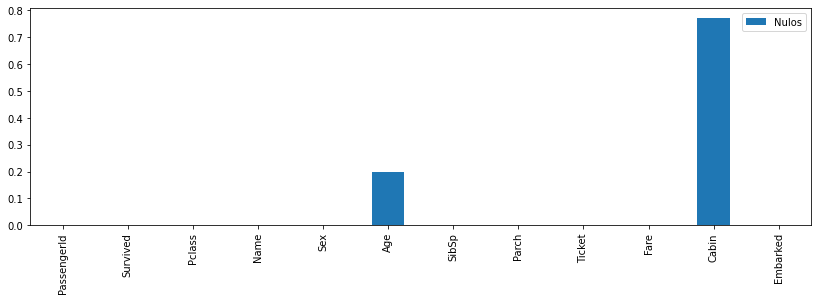

In [4]:
import matplotlib.pyplot as plt

nulos = pd.DataFrame(train_data.isna().sum() / train_data.isna().count(), columns=['Nulos'])
nulos.plot(kind='bar', figsize=(14,4))

In [5]:
train_data[train_data['Embarked'].isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

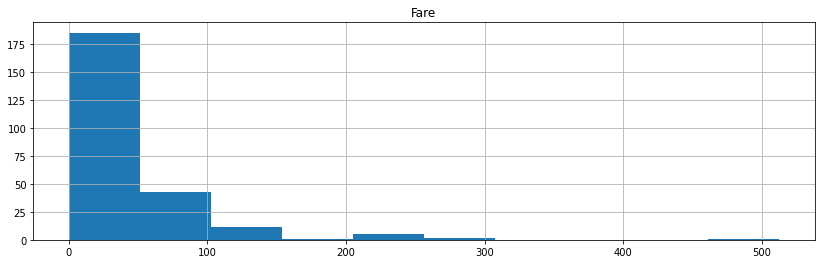

In [6]:
df_fares = pd.DataFrame(train_data['Fare'].unique(), columns=['Fare'])
df_fares.hist(figsize=(14,4),column='Fare')

In [7]:
train_data[train_data['Fare']>200].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


In [8]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [10]:
train_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [11]:
train_data_clean = train_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked']]
train_data_clean = train_data_clean[train_data['Age'].notna()]
train_data_clean = train_data_clean[train_data['Embarked'].notna()]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


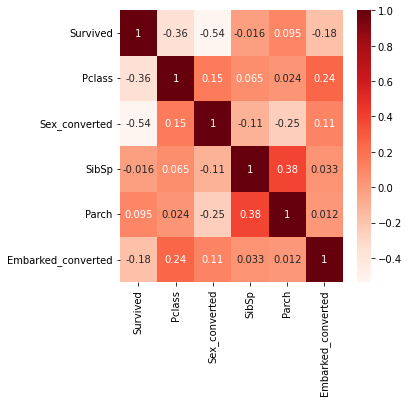

In [12]:
import seaborn as sns
from sklearn import preprocessing

column_Sex = preprocessing.LabelEncoder()
column_Sex.fit(train_data_clean['Sex'])
train_data_clean['Sex_converted'] = column_Sex.transform(train_data_clean['Sex'])

column_Embarked = preprocessing.LabelEncoder()
column_Embarked.fit(train_data_clean['Embarked'])
train_data_clean['Embarked_converted'] = column_Embarked.transform(train_data_clean['Embarked'])

train_data_converted = train_data_clean[['Survived','Pclass','Sex_converted','SibSp','Parch','Embarked_converted']]

plt.figure(figsize=(5,5))
cor = train_data_converted.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
column_Sex_test = preprocessing.LabelEncoder()
column_Sex_test.fit(test_data['Sex'])
test_data['Sex_converted'] = column_Sex_test.transform(test_data['Sex'])

column_Embarked_test = preprocessing.LabelEncoder()
column_Embarked_test.fit(test_data['Embarked'])
test_data['Embarked_converted'] = column_Embarked_test.transform(test_data['Embarked'])

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

feature_Survived = 'Survived'
features = ['Pclass','Sex_converted','Embarked_converted']
features_selected = [feature_Survived,'Pclass','Sex_converted','Embarked_converted']
train_data_selected = train_data_converted[features_selected]

Y_train = train_data_selected[feature_Survived]
#Y_test = test_data[feature_Survived]

test_data_selected = test_data[features]
X_train = pd.get_dummies(train_data_selected[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, Y_train)
X_pred = model.predict(X_test)

Y_pred = model.predict(X_train)
print(classification_report(Y_train, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       424
           1       0.92      0.55      0.69       288

    accuracy                           0.80       712
   macro avg       0.84      0.76      0.77       712
weighted avg       0.82      0.80      0.79       712



In [15]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': X_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
